# pandas와 SQL 비교

In [1]:
import pandas as pd
import numpy as np

In [2]:
tips = pd.read_csv('tips.csv')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## SELECT 기능

-> sql에서

SELECT total_bill, tip, smoker, time

FROM tips

LIMIT 5;

In [4]:
tips[["total_bill", "tip", "smoker", "time"]].head(5)

,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner


SELECT *, tip/total_bill as tip_rate

FROM tips

LIMIT 5;

In [5]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:>

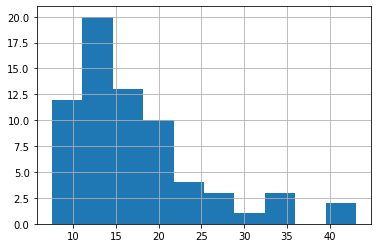

In [6]:
tips[tips['time'] == 'Lunch'].total_bill.hist()

<AxesSubplot:>

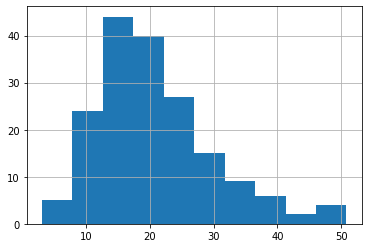

In [7]:
tips[tips['time'] == 'Dinner'].total_bill.hist()

## WHERE
SELECT *

FROM tips

WHERE time = 'Dinner'

LIMIT 5;

In [8]:
tips[tips["time"] == "Dinner"].head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
is_dinner = tips["time"] == "Dinner"
is_dinner.value_counts()

True     176
False     68
Name: time, dtype: int64

In [10]:
tips[is_dinner].head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


-- tips of more than $5.00 at Dinner meals

SELECT *

FROM tips

WHERE time = 'Dinner' AND tip > 5.00;

In [11]:
# tips of more than $5.00 at Dinner meals
tips[(tips["time"] == "Dinner") & (tips["tip"] > 5.00)]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2


-- tips by parties of at least 5 diners OR bill total was more than $45

SELECT *

FROM tips

WHERE size >= 5 OR total_bill > 45;

In [12]:
# tips by parties of at least 5 diners OR bill total was more than $45
tips[(tips["size"] >= 5) | (tips["total_bill"] > 45)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
185,20.69,5.00,Male,No,Sun,Dinner,5


In [13]:
# NULL checking is done using the notna() and isna() methods.
frame = pd.DataFrame({"col1": ["A", "B", np.NaN, "C", "D"],
                      "col2": ["F", np.NaN, "G", "H", "I"]})
frame

,col1,col2
0,A,F
1,B,NaN
2,NaN,G
3,C,H
4,D,I


SELECT *

FROM frame

WHERE col2 IS NULL;

In [14]:
frame[frame["col2"].isna()]

,col1,col2
1,B,NaN


SELECT *

FROM frame

WHERE col1 IS NOT NULL;

In [15]:
# Getting items where col1 IS NOT NULL can be done with notna().
frame[frame["col1"].notna()]

,col1,col2
0,A,F
1,B,NaN
3,C,H
4,D,I


## GROUP BY

SELECT sex, count(*)

FROM tips

GROUP BY sex;

---
Female     87

Male      157

In [16]:
tips.groupby("sex").size()

sex
Female     87
Male      157
dtype: int64

In [17]:
tips.groupby("sex").count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


In [18]:
tips.groupby("sex")["total_bill"].count()

sex
Female     87
Male      157
Name: total_bill, dtype: int64

SELECT day, AVG(tip), COUNT(*)

FROM tips

GROUP BY day;

---
Fri   2.734737   19

Sat   2.993103   87

Sun   3.255132   76

Thur  2.771452   62

select day, avg(tip), count(*)

from tips

group by day order by day asc;

In [19]:
tips.groupby("day").agg({"tip": np.mean, "day": np.size})

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


In [20]:
week = tips.groupby("day").agg({"tip": np.mean, "day": np.size})

In [21]:
week

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


In [22]:
week.describe()

,tip,day
count,4.000000,4.000000
mean,2.938606,61.000000
std,0.239904,29.810513
min,2.734737,19.000000
25%,2.762273,51.250000
50%,2.882278,69.000000
75%,3.058610,78.750000
max,3.255132,87.000000


SELECT smoker, day, COUNT(*), AVG(tip)

FROM tips

GROUP BY smoker, day;

---
smoker day
No     Fri      4  2.812500

       Sat     45  3.102889
       
       Sun     57  3.167895
       
       Thur    45  2.673778
       
Yes    Fri     15  2.714000

       Sat     42  2.875476
       
       Sun     19  3.516842
       
       Thur    17  3.030000

In [23]:
tips.groupby(["smoker", "day"]).agg({"tip": [np.size, np.mean]})

tip          
             size      mean
smoker day                 
No     Fri    4.0  2.812500
       Sat   45.0  3.102889
       Sun   57.0  3.167895
       Thur  45.0  2.673778
Yes    Fri   15.0  2.714000
       Sat   42.0  2.875476
       Sun   19.0  3.516842
       Thur  17.0  3.030000

## JOIN

In [24]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value": np.random.randn(4)})

In [25]:
df1

,key,value
0,A,-0.473074
1,B,-0.239267
2,C,0.503704
3,D,-2.608029


In [26]:
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})

In [27]:
df2

,key,value
0,B,-2.205402
1,D,-0.286786
2,D,0.495436
3,E,-0.918615


### INNER JOIN

SELECT *

FROM df1

INNER JOIN df2

ON df1.key = df2.key;

In [28]:
# merge performs an INNER JOIN by default
pd.merge(df1, df2, on="key")

,key,value_x,value_y
0,B,-0.239267,-2.205402
1,D,-2.608029,-0.286786
2,D,-2.608029,0.495436


In [29]:
indexed_df2 = df2.set_index("key")
pd.merge(df1, indexed_df2, left_on="key", right_index=True)

,key,value_x,value_y
1,B,-0.239267,-2.205402
3,D,-2.608029,-0.286786
3,D,-2.608029,0.495436


### LEFT OUTER JOIN

-- show all records from df1

SELECT *

FROM df1

LEFT OUTER JOIN df2

ON df1.key = df2.key;

In [30]:
# show all records from df1
pd.merge(df1, df2, on="key", how="left")

,key,value_x,value_y
0,A,-0.473074,NaN
1,B,-0.239267,-2.205402
2,C,0.503704,NaN
3,D,-2.608029,-0.286786
4,D,-2.608029,0.495436


### RIGHT JOIN

-- show all records from df2

SELECT *

FROM df1

RIGHT OUTER JOIN df2

ON df1.key = df2.key;

In [31]:
# show all records from df2
pd.merge(df1, df2, on="key", how="right")

,key,value_x,value_y
0,B,-0.239267,-2.205402
1,D,-2.608029,-0.286786
2,D,-2.608029,0.495436
3,E,NaN,-0.918615


### FULL JOIN

-- show all records from both tables

SELECT *

FROM df1

FULL OUTER JOIN df2

ON df1.key = df2.key;

In [32]:
# show all records from both frames
pd.merge(df1, df2, on="key", how="outer")

,key,value_x,value_y
0,A,-0.473074,NaN
1,B,-0.239267,-2.205402
2,C,0.503704,NaN
3,D,-2.608029,-0.286786
4,D,-2.608029,0.495436
5,E,NaN,-0.918615


## UNION
UNION ALL can be performed using concat().

In [33]:
df1 = pd.DataFrame({"city": ["Chicago", "San Francisco", "New York City"], "rank": range(1, 4)})
df2 = pd.DataFrame({"city": ["Chicago", "Boston", "Los Angeles"], "rank": [1, 4, 5]})

SELECT city, rank

FROM df1

UNION ALL

SELECT city, rank

FROM df2;

---
city  rank

      Chicago     1

San Francisco     2

New York City     3

      Chicago     1
      
       Boston     4
       
  Los Angeles     5

In [34]:
pd.concat([df1, df2])

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
0,Chicago,1
1,Boston,4
2,Los Angeles,5


SELECT city, rank

FROM df1

UNION

SELECT city, rank

FROM df2;

-- notice that there is only one Chicago record this time

         city  rank
         
      Chicago     1
      
San Francisco     2

New York City     3

       Boston     4
       
  Los Angeles     5

In [35]:
# In pandas, you can use concat() in conjunction with drop_duplicates().
pd.concat([df1, df2]).drop_duplicates()

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
1,Boston,4
2,Los Angeles,5


## pandas equivalents for some SQL analytic and aggregate functions
### Top n rows with offset

-- MySQL

SELECT * FROM tips

ORDER BY tip DESC

LIMIT 10 OFFSET 5;

In [36]:
tips.nlargest(10 + 5, columns="tip").tail(10)

,total_bill,tip,sex,smoker,day,time,size
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4


### Top n rows per group

-- Oracle's ROW_NUMBER() analytic function

SELECT * FROM (

    SELECT t.*,
    
        ROW_NUMBER() OVER(PARTITION BY day ORDER BY total_bill DESC) AS rn
    
  FROM tips t)

WHERE rn < 3

ORDER BY day, rn;

In [37]:
(tips.assign(
    rn=tips.sort_values(["total_bill"], ascending=False)
    .groupby(["day"]).cumcount() + 1)
    .query("rn < 3").sort_values(["day", "rn"]))

,total_bill,tip,sex,smoker,day,time,size,rn
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1
90,28.97,3.00,Male,Yes,Fri,Dinner,2,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1
212,48.33,9.00,Male,No,Sat,Dinner,4,2
156,48.17,5.00,Male,No,Sun,Dinner,6,1
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4,1
142,41.19,5.00,Male,No,Thur,Lunch,5,2


In [38]:
# the same using rank(method='first') function
(tips.assign(rnk=tips.groupby(["day"])["total_bill"]
             .rank(method="first", ascending=False))
             .query("rnk < 3").sort_values(["day", "rnk"]))

,total_bill,tip,sex,smoker,day,time,size,rnk
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.0
90,28.97,3.00,Male,Yes,Fri,Dinner,2,2.0
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1.0
212,48.33,9.00,Male,No,Sat,Dinner,4,2.0
156,48.17,5.00,Male,No,Sun,Dinner,6,1.0
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.0
197,43.11,5.00,Female,Yes,Thur,Lunch,4,1.0
142,41.19,5.00,Male,No,Thur,Lunch,5,2.0


-- Oracle's RANK() analytic function

SELECT * FROM (

SELECT

t.*,

RANK() OVER(PARTITION BY sex ORDER BY tip) AS rnk

FROM tips t

WHERE tip < 2)

WHERE rnk < 3

ORDER BY sex, rnk;

In [39]:
(tips[tips["tip"] < 2]
 .assign(rnk_min=tips.groupby(["sex"])["tip"].rank(method="min"))
 .query("rnk_min < 3").sort_values(["sex", "rnk_min"]))

,total_bill,tip,sex,smoker,day,time,size,rnk_min
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.0
92,5.75,1.00,Female,Yes,Fri,Dinner,2,1.0
111,7.25,1.00,Female,No,Sat,Dinner,1,1.0
236,12.60,1.00,Male,Yes,Sat,Dinner,2,1.0
237,32.83,1.17,Male,Yes,Sat,Dinner,2,2.0


## UPDATE
UPDATE tips

SET tip = tip*2

WHERE tip < 2;

In [40]:
tips.loc[tips["tip"] < 2, "tip"] *= 2

## DELETE
DELETE FROM tips

WHERE tip > 9;

In [41]:
tips = tips.loc[tips["tip"] <= 9]